In [1]:
import csv

In [2]:
def get_mapping(path):
    with open(path, mode='r') as infile:
        reader = csv.reader(infile)
        mydict = {rows[0]:rows[1] for rows in reader}
        return mydict

In [3]:
#q1
#what is returned by your get_mapping("small_mapping.csv") function?
mapping = get_mapping('small_mapping.csv')
mapping

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [4]:
#q2
#what is the value associated with the key "tt0313542"?
#what is the value associated with the key "nm0752751"?
mapping['nm0752751']

'Mitchell Ryan'

In [5]:
#q3
#what are the values in the mapping associated with keys beginning with "tt"?
values_with_keys_tt = []
for key in mapping:
    if key.startswith('tt'):
        values_with_keys_tt += [mapping[key]]
values_with_keys_tt

['Runaway Jury', 'Lethal Weapon']

In [6]:
#q4
#which keys in the mapping map to people with a first name of "Gary"?
keys_with_gary = []
for key in mapping:
    value = mapping[key]
    if value.startswith('Gary '):
        keys_with_gary += [key]
keys_with_gary

['nm0000997', 'nm0001219']

In [7]:
def get_raw_movies(path):
    movies = []
    keys = []
    first = True
    with open(path, mode='r') as infile:
        reader = csv.reader(infile)
        for row in reader:
            if first is True:
                keys = row
                first = False
            else:
                values = row
                movie_dict = {}
                for i in range(len(keys)):
                    movie_dict[keys[i]] = values[i]
                movie_dict['year'] = int(movie_dict['year'])
                movie_dict['rating'] = float(movie_dict['rating'])
                movie_dict['directors'] = movie_dict['directors'].split(',')
                movie_dict['actors'] = movie_dict['actors'].split(',')
                movie_dict['genres'] = movie_dict['genres'].split(',')
                movies += [movie_dict]
    return movies

In [8]:
#q5
#what does get_raw_movies("small_movies.csv") return?
movies = get_raw_movies("small_movies.csv")
movies

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [9]:
#q6
#how many genres did the movie at index 0 have?
len(movies[0]['genres'])

3

In [10]:
#q7
#what is the ID of the last actor listed for the move at index 1?
movies[1]['actors'][-1]

'nm0752751'

In [11]:
def get_movies(movies_path, mappings_path):
    mappings = get_mapping(mappings_path)
    movies = get_raw_movies(movies_path)
    for movie in movies:
        movie['title'] = mappings[movie['title']]
        director_names = []
        for director in movie['directors']:
            director_names += [mappings[director]]
        movie['directors'] = director_names
        actor_names = []
        for actor in movie['actors']:
            actor_names += [mappings[actor]]
        movie['actors'] = actor_names
    return movies

In [12]:
small = get_movies('small_movies.csv', 'small_mapping.csv')

In [13]:
#q8
#what is small[0]["title"]?
small[0]["title"]

'Runaway Jury'

In [14]:
#q9
#what is small[1]["directors"]?
small[1]["directors"]

['Richard Donner']

In [15]:
#q10
#what is small[-1]["actors"]?
small[-1]["actors"]

['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan']

In [16]:
#q11
#what is small?
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [17]:
movies = get_movies("movies.csv", "mapping.csv")

In [18]:
#q12
#what are the first 3 rows in movies?
movies[:3]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']},
 {'title': 'The Barefoot Executive',
  'year': 1971,
  'rating': 6.0,
  'directors': ['Robert Butler'],
  'actors': ['Kurt Russell', 'Joe Flynn', 'Harry Morgan', 'Wally Cox'],
  'genres': ['Comedy', 'Family']}]

In [19]:
#q13
#what are the last 3 rows in movies?
movies[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [20]:
# you are not allowed to change this function
def filter_movies_by_year(movies, year):
    i = 0
    movies_copy = movies.copy()
    while i < len(movies_copy):
        if movies_copy[i]["year"] != year:
            movies_copy.pop(i)
        else:
            i += 1
    return movies_copy

In [21]:
#q14
#what are the movies from 1930?
movies_1930 = filter_movies_by_year(movies, 1930)
movies_1930

[{'title': 'Hook Line and Sinker',
  'year': 1930,
  'rating': 6.4,
  'directors': ['Edward F. Cline'],
  'actors': ['Bert Wheeler', 'Robert Woolsey', 'Ralf Harolde'],
  'genres': ['Comedy', 'Romance']},
 {'title': 'The Big Trail',
  'year': 1930,
  'rating': 7.2,
  'directors': ['Raoul Walsh', 'Louis R. Loeffler'],
  'actors': ['John Wayne', 'El Brendel', 'Tully Marshall'],
  'genres': ['Adventure', 'Romance', 'Western']}]

In [22]:
#q15
#what are the movies from 1931?
filter_movies_by_year(movies, 1931)

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [23]:
def get_number_of_uniques(movies, column):
    unique_col_values = set()
    for movie in movies:
        for val in movie[column]:
            unique_col_values.add(val)
    return len(unique_col_values)

In [24]:
#q16
#how many unique genres are there in the dataset?
get_number_of_uniques(movies, 'genres')

18

In [25]:
#q17
#how many unique actor names are there in the dataset?
get_number_of_uniques(movies, 'actors')

2605

In [26]:
#q18
#how many unique director names are there in the dataset?
get_number_of_uniques(movies, 'directors')

1247

In [27]:
def get_avg_movie_rating(movies):
    avg_rating = 0.0
    for movie in movies:
        avg_rating += movie['rating']
    return avg_rating/len(movies)

In [28]:
#q19
#what is the average movie rating?
get_avg_movie_rating(movies)

6.401659528907912

In [29]:
#q20
#what is the longest movie title in the dataset (in terms of most characters)
longest_name = ""
longest_length = 0
for movie in movies:
    if len(movie['title']) > longest_length:
        longest_name = movie['title']
        longest_length = len(movie['title'])
longest_name

'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb'

In [30]:
def bucketize(movie_list, movie_key):
    bucketized_movies = {}
    for movie in movie_list:
        if type(movie[movie_key]) is list:
            for key in movie[movie_key]:
                if key not in bucketized_movies:
                    bucketized_movies[key] = [movie]
                else:
                    bucketized_movies[key] += [movie]
        else:
            if movie[movie_key] not in bucketized_movies:
                bucketized_movies[movie[movie_key]] = [movie]
            else:
                bucketized_movies[movie[movie_key]] += [movie]
                
    return bucketized_movies

In [31]:
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]

In [32]:
#q21
#what is bucketize(test_movies, "year")?
bucketize(test_movies, "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [33]:
#q22
#bucketize(test_movies, "style")
bucketize(test_movies, "style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [34]:
#q23
#bucketize(test_movies, "genres")
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [35]:
#q24
#bucketize(small, "genres")
bucketize(small, "genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [36]:
#q25
#how many different unique actors appear in the small dataset
len(bucketize(small, "actors"))

7

In [37]:
#q26
#how many unique genres appear in the full dataset
len(bucketize(movies, "genres"))

18

In [38]:
#q27
#how many movies are there of each genre
buckets = bucketize(movies, 'genres')
genre_count = {}
for genre in buckets:
    genre_count[genre] = len(buckets[genre])
    
genre_count

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

In [39]:
import matplotlib.pylab as plt
def plot_dict(input_dict, xlabel, ylabel):
    lists = sorted(input_dict.items()) 
    x, y = zip(*lists) 
    plt.bar(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()

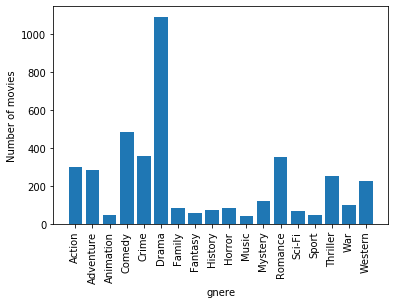

In [40]:
#q28
#how many movies are there of each genre? (plot your answer)
plot_dict(genre_count, 'gnere', 'Number of movies')

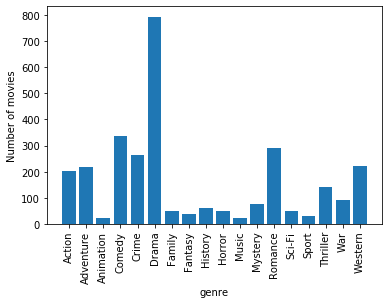

In [41]:
#q29
#how many movies are there of each genre, prior to 2000? (plot your answer)
buckets = bucketize(movies, 'genres')
genre_count = {}
for genre in buckets:
    genre_count[genre] = 0
    for movie in buckets[genre]:
        if movie['year'] < 2000:
            genre_count[genre] += 1
    
plot_dict(genre_count, 'genre', 'Number of movies')

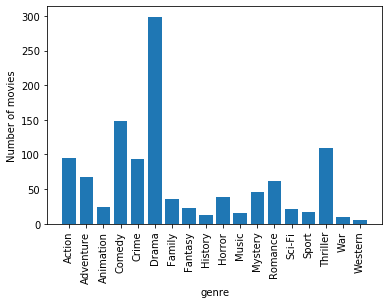

In [42]:
#q30
#how many movies are there of each genre, in or after 2000? (plot your answer)
buckets = bucketize(movies, 'genres')
genre_count = {}
for genre in buckets:
    genre_count[genre] = 0
    for movie in buckets[genre]:
        if movie['year'] >= 2000:
            genre_count[genre] += 1
    
plot_dict(genre_count, 'genre', 'Number of movies')

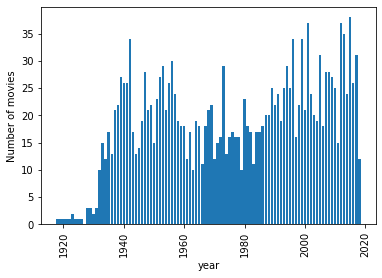

In [43]:
#q31
#how many movies have there been per year, since (and including) 2000? (plot your answer)
buckets = bucketize(movies, 'year')
year_count = {}
for year in buckets:
    year_count[year] = len(buckets[year])
    
plot_dict(year_count, 'year', 'Number of movies')

In [44]:
#q32
#what are the directing career spans of the directors who have directed for at least 30 years?
import math
def get_spans(movies, people, threshold):
    spans_mapping = {}
    buckets = bucketize(movies, people)
    for person in buckets:
        movies = buckets[person]
        min_year = (math.inf)
        max_year = 0
        for i in range(len(movies)):
            if movies[i]['year'] > max_year:
                max_year = movies[i]['year']
            if movies[i]['year'] < min_year:
                min_year = movies[i]['year']
        if (max_year - min_year) >= threshold:
            spans_mapping[person] = max_year-min_year
    return spans_mapping

get_spans(movies, 'directors', 30)

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'Henry Hathaway': 36,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'Cecil B. DeMille': 30,
 'Lee H. Katzin': 30,
 'Richard Fleischer': 32,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [45]:
#q33
#what are the acting career spans of the actors who have acted for at least 40 years?
get_spans(movies, 'actors', 40)

{'Robert De Niro': 49,
 'Kurt Russell': 50,
 'John Wayne': 46,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Henry Fonda': 46,
 'Glenn Ford': 52,
 'Jeff Bridges': 48,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'Dennis Quaid': 40,
 'Marlon Brando': 49,
 'Armand Assante': 40,
 'Eddie Albert': 41,
 'Jon Voight': 44,
 'Tony Curtis': 45,
 'Michael Constantine': 42,
 'Ernest Borgnine': 47,
 'Rod Steiger': 45,
 'George Burns': 60,
 'Bruce Dern': 45,
 'Fredric March': 41,
 'Lloyd Bridges': 44,
 'Robert Redford': 44,
 'Dean Stockwell': 53}

In [46]:
def get_formatted_list(input_list):
    output_list = []
    for element in input_list:
        output_list += [{'name': element[0], 'span': element[1]}]
    return output_list

In [47]:
#q34
#who are the 10 directors with the longest careers?
director_spans = get_spans(movies, 'directors', 0)
director_spans = sorted(director_spans.items(), key=lambda x: x[1], reverse=True)
get_formatted_list(director_spans[:10])

[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31}]

In [48]:
#q35
#who are the 10 actors with the longest careers?
director_spans = get_spans(movies, 'actors', 0)
director_spans = sorted(director_spans.items(), key=lambda x: x[1], reverse=True)
get_formatted_list(director_spans[:10])

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [49]:
from statistics import median
def get_median_ratings_with_count(movies, column):
    median_ratings = []
    buckets = bucketize(movies, column)
    for key in buckets: 
        movies = buckets[key]
        count = len(movies)
        median_list = []
        for movie in movies:
            median_list += [movie['rating']]
        median_val = median(median_list)
        median_ratings += [{'category': key, 'rating': median_val, 'count': count}]
    return median_ratings

In [50]:
#q36
#what are the three genres in which movies receive the highest median rating?
median_ratings = get_median_ratings_with_count(movies, 'genres')
sorted(median_ratings, key=lambda x: x['rating'], reverse=True)[:3]

[{'category': 'Animation', 'rating': 7.3, 'count': 45},
 {'category': 'History', 'rating': 6.7, 'count': 73},
 {'category': 'War', 'rating': 6.7, 'count': 99}]

In [51]:
#q37
# what were the 10 best years for movies?
best_years = get_median_ratings_with_count(movies, 'year')
best_years = sorted(best_years, key=lambda x: x['rating'], reverse=True)[:10]
best_years

[{'category': 1921, 'rating': 8.3, 'count': 1},
 {'category': 1925, 'rating': 8.2, 'count': 1},
 {'category': 1919, 'rating': 7.5, 'count': 1},
 {'category': 1923, 'rating': 7.3, 'count': 2},
 {'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17},
 {'category': 1963, 'rating': 6.95, 'count': 10}]

In [52]:
#q38
#what were the 5 best years for movies, if we only consider years with at least 10 movies?
def filter_ratings_on_count(input_list, threshold):
    output_list = []
    for i in range(len(input_list)):
        if input_list[i]['count'] < threshold:
            continue
        else:
            output_list += [input_list[i]]
    return sorted(output_list, key=lambda x: x['rating'], reverse=True)
filter_ratings_on_count(best_years, 10)[:5]

[{'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17}]

In [53]:
#q39
#who are the 6 best directors, if we only count directors having at least 3 movies?
filter_ratings_on_count(get_median_ratings_with_count(movies, 'directors'), 3)[:6]

[{'category': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'category': 'Leonid Gayday', 'rating': 8.4, 'count': 5},
 {'category': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'category': 'Sergio Leone', 'rating': 8.3, 'count': 7},
 {'category': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'category': 'Andrew Grieve', 'rating': 8.2, 'count': 6}]

In [54]:
#q40
#who are the 3 best actors, if we only count actors having at least 5 movies
filter_ratings_on_count(get_median_ratings_with_count(movies, 'actors'), 5)[:3]

[{'category': 'Henry Bergman', 'rating': 8.2, 'count': 5},
 {'category': 'Ioan Gruffudd', 'rating': 8.2, 'count': 6},
 {'category': 'Robert Lindsay', 'rating': 8.2, 'count': 6}]